In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as lr_scheduler
from sklearn import datasets

def generate_circle_data(num_samples=100, radius=1.0):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    data = np.stack((x, y), axis=-1)
    return torch.tensor(data, dtype=torch.float32)

def generate_square_data(num_samples=100, side=2.0):
    side = side / np.sqrt(2)  # Adjust the side length to make area equal to a unit circle
    points_per_side = num_samples // 4
    x = np.linspace(-side, side, points_per_side)
    y = np.linspace(-side, side, points_per_side)
    top = np.stack((x, np.full(points_per_side, side)), axis=-1)
    bottom = np.stack((x, np.full(points_per_side, -side)), axis=-1)
    right = np.stack((np.full(points_per_side, side), y), axis=-1)
    left = np.stack((np.full(points_per_side, -side), y), axis=-1)
    data = np.concatenate([top, bottom, right, left])[:num_samples]
    np.random.shuffle(data)
    return torch.tensor(data, dtype=torch.float32)

def generate_star_data(num_samples=100, num_branches=5, outer_radius=1.0, inner_radius=0.5):
    angles = np.linspace(0, 2 * np.pi, num_branches * 2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_branches)
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    data = np.stack((x, y), axis=-1)
    repeat_factor = num_samples // data.shape[0]
    data = np.tile(data, (repeat_factor + 1, 1))[:num_samples]
    return torch.tensor(data, dtype=torch.float32)

def generate_data(shape='circle', num_samples=100):
    if shape == 'circle':
        return generate_circle_data(num_samples)
    elif shape == 'square':
        return generate_square_data(num_samples)
    elif shape == 'star':
        return generate_star_data(num_samples)
    else:
        raise ValueError("Unsupported shape: {}".format(shape))

# Example usage:
data = generate_data(shape='circle', num_samples=100)
print(data.shape)  # Should output: torch.Size([1000, 2])


torch.Size([100, 2])


[0, 142, 285, 428, 571, 714, 857, 1000]


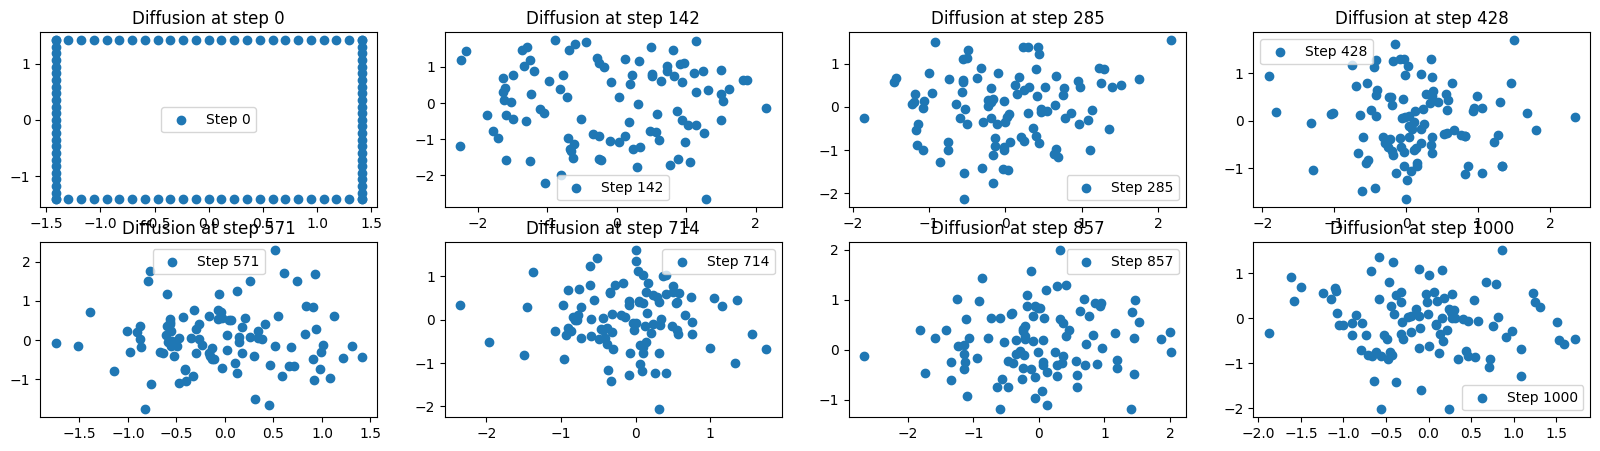

In [29]:

def simulate_diffusion(data, B, num_steps):
    # Convert data to PyTorch tensor if it's not already
    x = torch.tensor(data, dtype=torch.float32) if not isinstance(data, torch.Tensor) else data
    x_diffused = [x.numpy()]  # Store the initial data

    dt = 1.0 / num_steps  # Calculate the timestep
    N=1000

    indices = np.arange(N)
    time_steps = 1 + indices / (N - 1) * (dt - 1)

    for t in reversed(time_steps):
        # Apply the OU process to the data
        x = x - B(t)*x * dt + B(t)**.5 * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)
        x_diffused.append(x.numpy())

    return x_diffused

def B(t):
    mini=.1
    maxi=20
    b=mini+t*(maxi-mini)
    return b

# Use your circle data as the starting point
circle_data = generate_data('square')


num_steps = 1000

# Simulate the diffusion process
diffused_data = simulate_diffusion(circle_data,B , num_steps)

# Plot the diffusion process
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 5))
times = [ (i * num_steps) // 7 for i in  range(8)]
print(times)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(diffused_data[times[i]][:, 0], diffused_data[times[i]][:, 1], label=f'Step {times[i]}')
    ax.set_title(f'Diffusion at step {times[i]}')
    ax.legend()

plt.show()


Epoch: 0 and Loss: 0.010521883144974709


/var/folders/2m/j7q6pjm97vb7vx436d32d30w0000gn/T/ipykernel_17394/2182697266.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x + (B(t)/2*x + B(t)*score )*dt + B(t)**.5 * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)


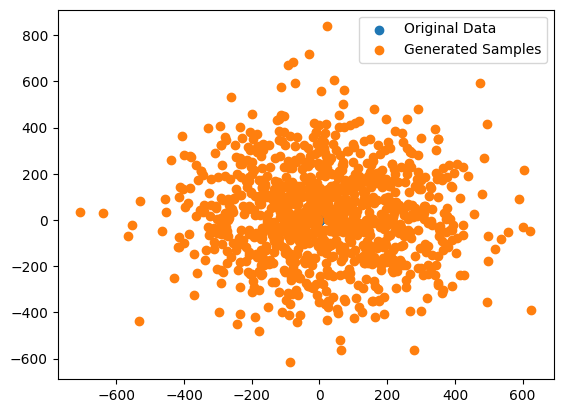

Epoch: 100 and Loss: 0.8009158968925476
Epoch: 200 and Loss: 0.7687560319900513
Epoch: 300 and Loss: 0.7768964171409607
Epoch: 400 and Loss: 0.7828876972198486
Epoch: 500 and Loss: 0.7787843942642212
Epoch: 600 and Loss: 0.8010646104812622
Epoch: 700 and Loss: 0.7743504047393799
Epoch: 800 and Loss: 0.7784965634346008
Epoch: 900 and Loss: 0.7695958614349365
Epoch: 1000 and Loss: 0.774173378944397


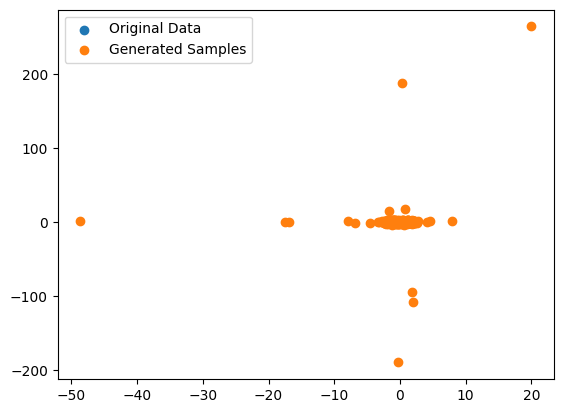

Epoch: 1100 and Loss: 0.782511293888092
Epoch: 1200 and Loss: 0.7793758511543274
Epoch: 1300 and Loss: 0.7787176370620728
Epoch: 1400 and Loss: 0.7679021954536438
Epoch: 1500 and Loss: 0.7822546362876892
Epoch: 1600 and Loss: 0.7827519774436951
Epoch: 1700 and Loss: 0.7858050465583801
Epoch: 1800 and Loss: 0.7789121866226196
Epoch: 1900 and Loss: 0.7829132080078125
Epoch: 2000 and Loss: 0.7703179121017456


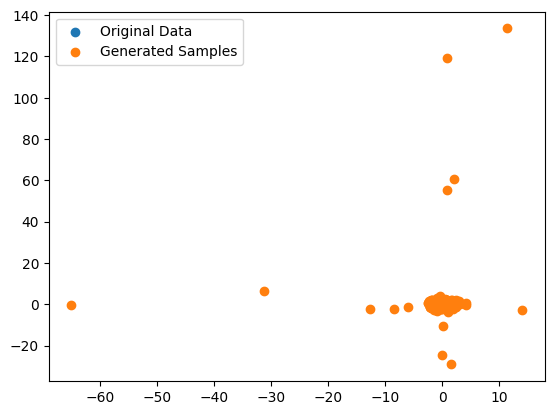

Epoch: 2100 and Loss: 0.7837451100349426
Epoch: 2200 and Loss: 0.7790077328681946
Epoch: 2300 and Loss: 0.7712597846984863
Epoch: 2400 and Loss: 0.7860751152038574
Epoch: 2500 and Loss: 0.7805206775665283
Epoch: 2600 and Loss: 0.7821951508522034
Epoch: 2700 and Loss: 0.7726821303367615
Epoch: 2800 and Loss: 0.7793505191802979
Epoch: 2900 and Loss: 0.7842190265655518
Epoch: 3000 and Loss: 0.7745071649551392


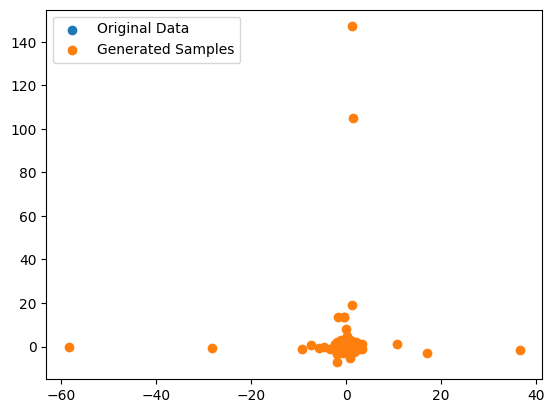

Epoch: 3100 and Loss: 0.7870092988014221
Epoch: 3200 and Loss: 0.7850404381752014
Epoch: 3300 and Loss: 0.7802764773368835
Epoch: 3400 and Loss: 0.7789055109024048
Epoch: 3500 and Loss: 0.7796939611434937
Epoch: 3600 and Loss: 0.7780780792236328
Epoch: 3700 and Loss: 0.7828898429870605
Epoch: 3800 and Loss: 0.7832843661308289
Epoch: 3900 and Loss: 0.7749484777450562
Epoch: 4000 and Loss: 0.7669415473937988


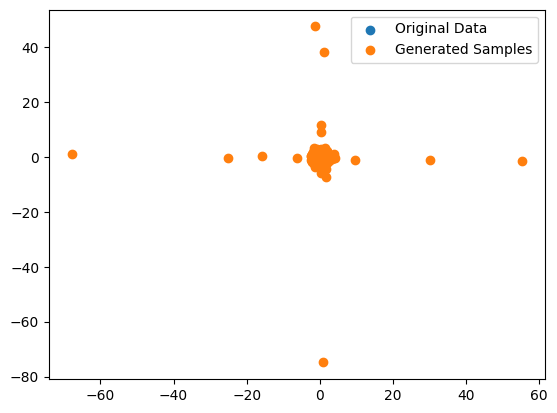

Epoch: 4100 and Loss: 0.7790202498435974
Epoch: 4200 and Loss: 0.7770516872406006
Epoch: 4300 and Loss: 0.7831620573997498
Epoch: 4400 and Loss: 0.7874017953872681
Epoch: 4500 and Loss: 0.7798489332199097
Epoch: 4600 and Loss: 0.7838340997695923
Epoch: 4700 and Loss: 0.7797929644584656
Epoch: 4800 and Loss: 0.7734397649765015
Epoch: 4900 and Loss: 0.7852960824966431
Epoch: 5000 and Loss: 0.7801104784011841


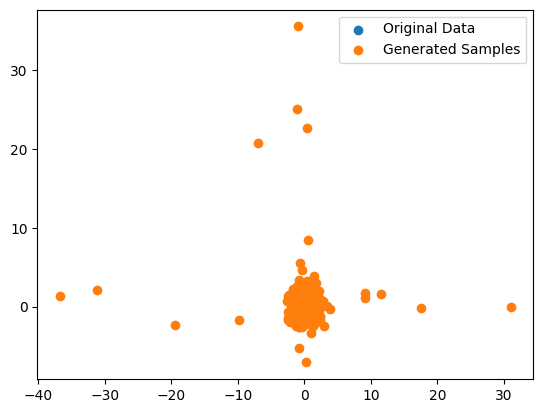

Epoch: 5100 and Loss: 0.7829983234405518
Epoch: 5200 and Loss: 0.7848567366600037
Epoch: 5300 and Loss: 0.7738390564918518
Epoch: 5400 and Loss: 0.778556764125824
Epoch: 5500 and Loss: 0.7716525197029114
Epoch: 5600 and Loss: 0.7840251922607422
Epoch: 5700 and Loss: 0.7903984189033508
Epoch: 5800 and Loss: 0.7795243263244629
Epoch: 5900 and Loss: 0.7788985371589661
Epoch: 6000 and Loss: 0.77265465259552


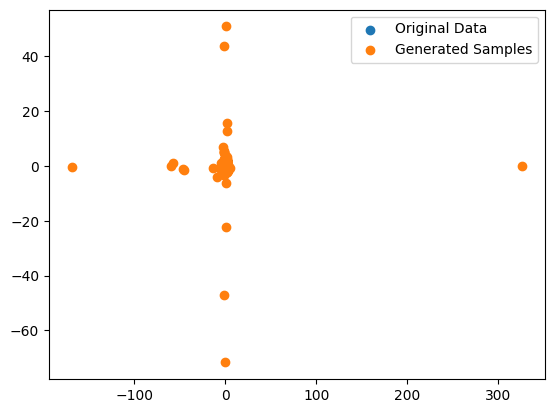

Epoch: 6100 and Loss: 0.7732712626457214
Epoch: 6200 and Loss: 0.7824133038520813
Epoch: 6300 and Loss: 0.7720080614089966
Epoch: 6400 and Loss: 0.7816576957702637
Epoch: 6500 and Loss: 0.7829568982124329
Epoch: 6600 and Loss: 0.781161904335022
Epoch: 6700 and Loss: 0.7800151705741882
Epoch: 6800 and Loss: 0.7763670086860657
Epoch: 6900 and Loss: 0.7705822587013245
Epoch: 7000 and Loss: 0.7767574191093445


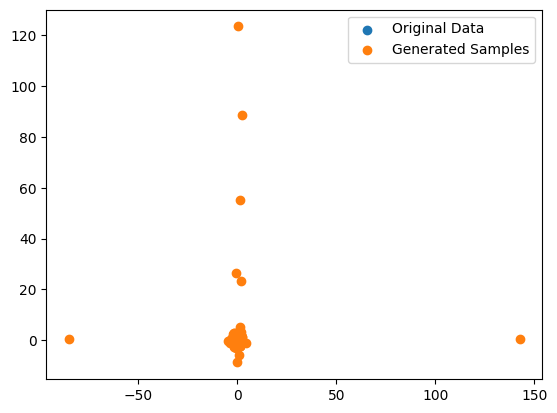

Epoch: 7100 and Loss: 0.7797906994819641
Epoch: 7200 and Loss: 0.7681007981300354
Epoch: 7300 and Loss: 0.7782703638076782
Epoch: 7400 and Loss: 0.7761527299880981
Epoch: 7500 and Loss: 0.7764449119567871
Epoch: 7600 and Loss: 0.7742194533348083
Epoch: 7700 and Loss: 0.7762541174888611
Epoch: 7800 and Loss: 0.7830736041069031
Epoch: 7900 and Loss: 0.7762905955314636
Epoch: 8000 and Loss: 0.7717740535736084


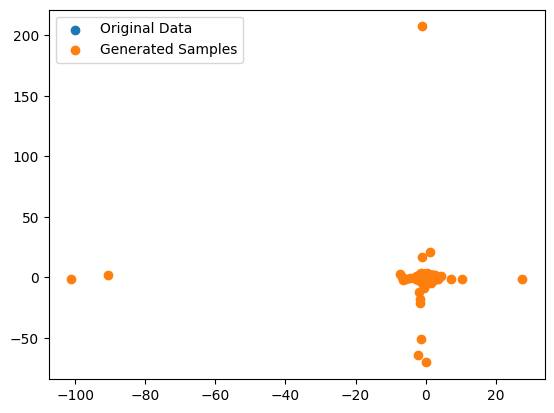

Epoch: 8100 and Loss: 0.77459716796875
Epoch: 8200 and Loss: 0.7827889323234558
Epoch: 8300 and Loss: 0.7759650945663452
Epoch: 8400 and Loss: 0.7778576016426086
Epoch: 8500 and Loss: 0.7748817205429077
Epoch: 8600 and Loss: 0.7796758413314819
Epoch: 8700 and Loss: 0.7821652889251709
Epoch: 8800 and Loss: 0.7608023285865784
Epoch: 8900 and Loss: 0.7831113338470459
Epoch: 9000 and Loss: 0.7762033343315125


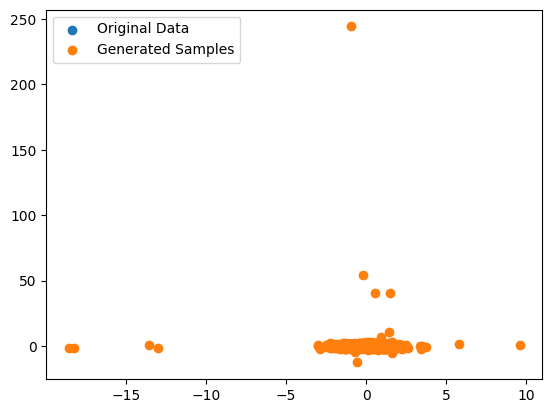

Epoch: 9100 and Loss: 0.7753363847732544
Epoch: 9200 and Loss: 0.7802751064300537
Epoch: 9300 and Loss: 0.7933558821678162
Epoch: 9400 and Loss: 0.7741605639457703
Epoch: 9500 and Loss: 0.7741061449050903
Epoch: 9600 and Loss: 0.7813718318939209
Epoch: 9700 and Loss: 0.7839861512184143
Epoch: 9800 and Loss: 0.7830860018730164
Epoch: 9900 and Loss: 0.7817566394805908
Epoch: 10000 and Loss: 0.7822960019111633


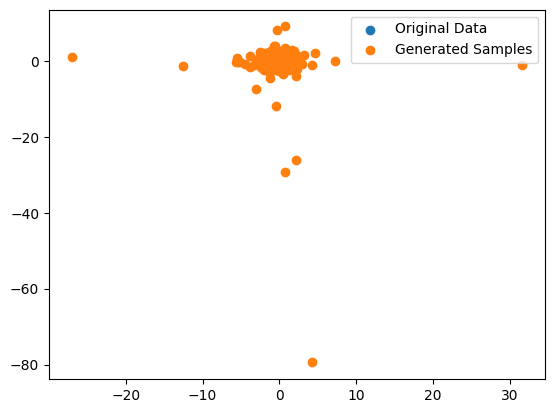

Epoch: 10100 and Loss: 0.7767108082771301
Epoch: 10200 and Loss: 0.7718614339828491
Epoch: 10300 and Loss: 0.7826080918312073
Epoch: 10400 and Loss: 0.7681290507316589
Epoch: 10500 and Loss: 0.7768809795379639
Epoch: 10600 and Loss: 0.7783464789390564
Epoch: 10700 and Loss: 0.7718837261199951
Epoch: 10800 and Loss: 0.7608165740966797
Epoch: 10900 and Loss: 0.7738274335861206
Epoch: 11000 and Loss: 0.7742576599121094


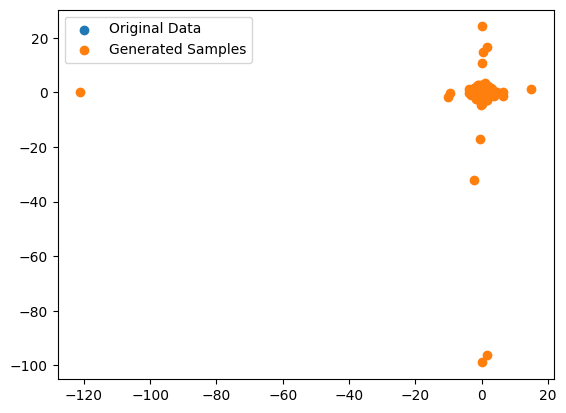

Epoch: 11100 and Loss: 0.7742087841033936
Epoch: 11200 and Loss: 0.7796862125396729
Epoch: 11300 and Loss: 0.7834271192550659
Epoch: 11400 and Loss: 0.7802640795707703
Epoch: 11500 and Loss: 0.7790753245353699
Epoch: 11600 and Loss: 0.7831481695175171
Epoch: 11700 and Loss: 0.7834125757217407
Epoch: 11800 and Loss: 0.779869794845581
Epoch: 11900 and Loss: 0.7658278942108154
Epoch: 12000 and Loss: 0.7770271301269531


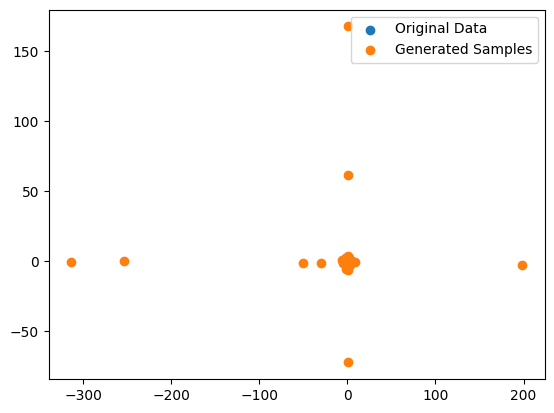

Epoch: 12100 and Loss: 0.7798177599906921
Epoch: 12200 and Loss: 0.776182234287262
Epoch: 12300 and Loss: 0.7675889730453491
Epoch: 12400 and Loss: 0.7744683623313904
Epoch: 12500 and Loss: 0.7722991704940796
Epoch: 12600 and Loss: 0.7719494104385376
Epoch: 12700 and Loss: 0.7744322419166565
Epoch: 12800 and Loss: 0.7720105648040771
Epoch: 12900 and Loss: 0.7744398713111877
Epoch: 13000 and Loss: 0.7735174298286438


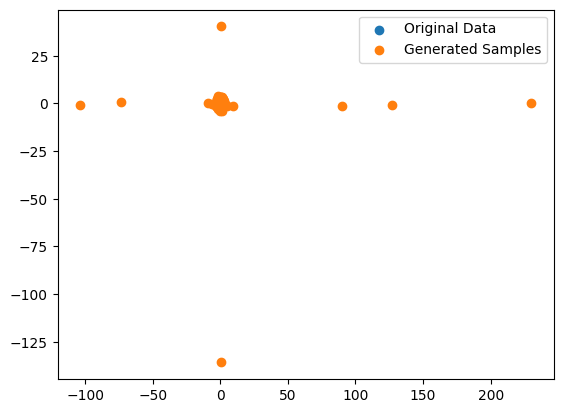

Epoch: 13100 and Loss: 0.7721922397613525
Epoch: 13200 and Loss: 0.7672007083892822
Epoch: 13300 and Loss: 0.7842859029769897
Epoch: 13400 and Loss: 0.779325008392334
Epoch: 13500 and Loss: 0.7735269665718079
Epoch: 13600 and Loss: 0.7654580473899841
Epoch: 13700 and Loss: 0.7760304808616638
Epoch: 13800 and Loss: 0.777668297290802
Epoch: 13900 and Loss: 0.7757090926170349
Epoch: 14000 and Loss: 0.7780486941337585


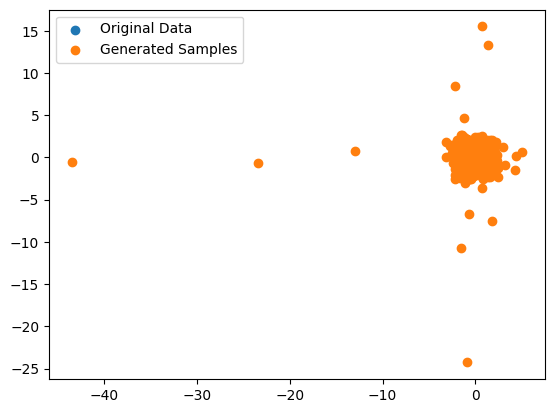

Epoch: 14100 and Loss: 0.775494396686554
Epoch: 14200 and Loss: 0.7684114575386047
Epoch: 14300 and Loss: 0.7838562726974487
Epoch: 14400 and Loss: 0.7765617370605469
Epoch: 14500 and Loss: 0.7811061143875122
Epoch: 14600 and Loss: 0.7769960165023804
Epoch: 14700 and Loss: 0.7722383737564087
Epoch: 14800 and Loss: 0.7808240652084351
Epoch: 14900 and Loss: 0.762850284576416
Epoch: 15000 and Loss: 0.7767539024353027


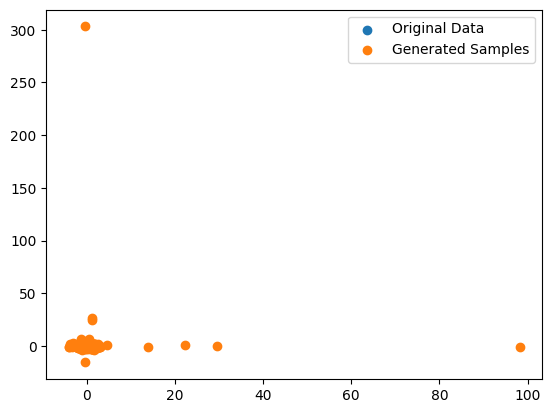

Epoch: 15100 and Loss: 0.7811012268066406
Epoch: 15200 and Loss: 0.7634811997413635
Epoch: 15300 and Loss: 0.7808041572570801
Epoch: 15400 and Loss: 0.7768555283546448
Epoch: 15500 and Loss: 0.7754227519035339
Epoch: 15600 and Loss: 0.779857873916626
Epoch: 15700 and Loss: 0.7758944630622864
Epoch: 15800 and Loss: 0.7850976586341858
Epoch: 15900 and Loss: 0.7731850147247314
Epoch: 16000 and Loss: 0.7674405574798584


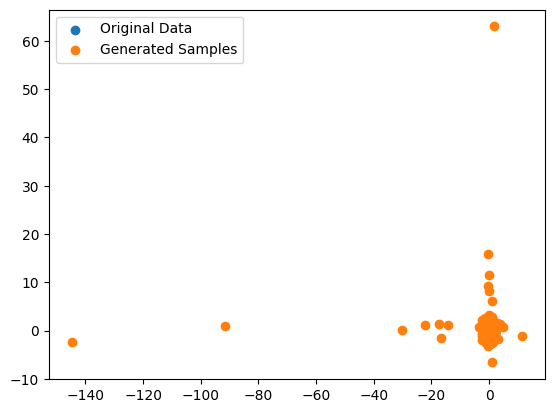

Epoch: 16100 and Loss: 0.7832703590393066
Epoch: 16200 and Loss: 0.772228479385376
Epoch: 16300 and Loss: 0.7765045166015625
Epoch: 16400 and Loss: 0.7777683138847351
Epoch: 16500 and Loss: 0.7772735357284546
Epoch: 16600 and Loss: 0.765383243560791
Epoch: 16700 and Loss: 0.7808589339256287
Epoch: 16800 and Loss: 0.7749250531196594
Epoch: 16900 and Loss: 0.770731508731842
Epoch: 17000 and Loss: 0.774038553237915


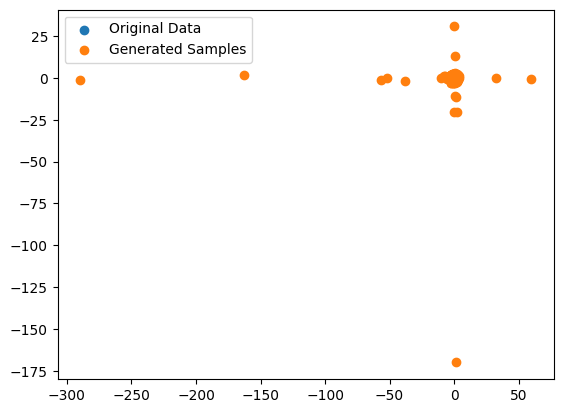

Epoch: 17100 and Loss: 0.7827095985412598
Epoch: 17200 and Loss: 0.770851731300354
Epoch: 17300 and Loss: 0.7762535810470581
Epoch: 17400 and Loss: 0.780351996421814
Epoch: 17500 and Loss: 0.7708698511123657
Epoch: 17600 and Loss: 0.7766338586807251
Epoch: 17700 and Loss: 0.7740316987037659
Epoch: 17800 and Loss: 0.7760670185089111
Epoch: 17900 and Loss: 0.7804455757141113
Epoch: 18000 and Loss: 0.7667294144630432


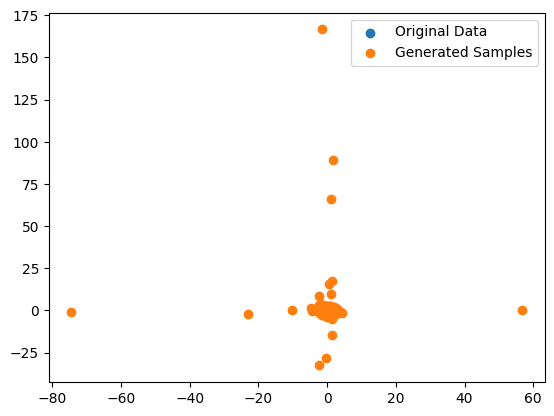

Epoch: 18100 and Loss: 0.7697255611419678
Epoch: 18200 and Loss: 0.7711833119392395
Epoch: 18300 and Loss: 0.7806236743927002
Epoch: 18400 and Loss: 0.7831637859344482
Epoch: 18500 and Loss: 0.765430748462677
Epoch: 18600 and Loss: 0.7830051183700562
Epoch: 18700 and Loss: 0.7876663208007812
Epoch: 18800 and Loss: 0.7757339477539062
Epoch: 18900 and Loss: 0.7908960580825806
Epoch: 19000 and Loss: 0.7707157731056213


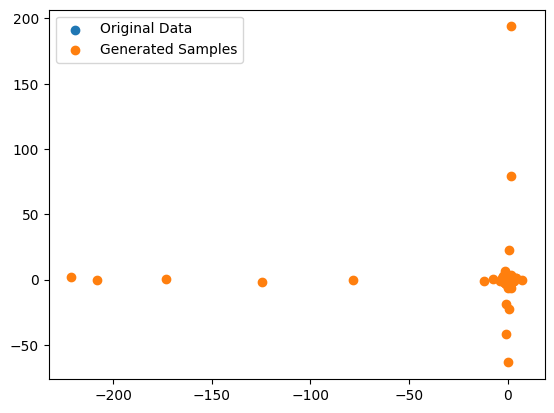

Epoch: 19100 and Loss: 0.7803317308425903
Epoch: 19200 and Loss: 0.7693535089492798
Epoch: 19300 and Loss: 0.788809061050415
Epoch: 19400 and Loss: 0.7777249813079834
Epoch: 19500 and Loss: 0.7742204070091248
Epoch: 19600 and Loss: 0.7777657508850098
Epoch: 19700 and Loss: 0.7799994945526123
Epoch: 19800 and Loss: 0.7761760950088501
Epoch: 19900 and Loss: 0.7776703834533691
Epoch: 20000 and Loss: 0.7622753381729126


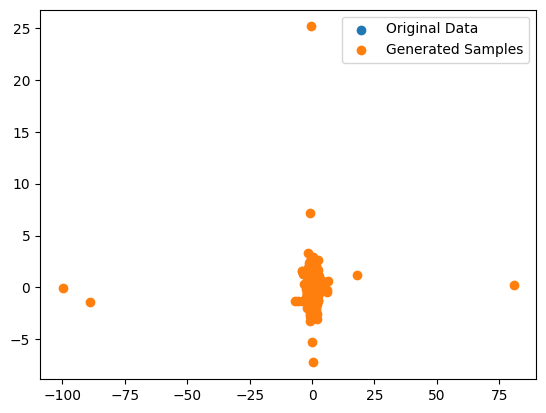

Epoch: 20100 and Loss: 0.781398594379425
Epoch: 20200 and Loss: 0.7820547223091125
Epoch: 20300 and Loss: 0.7744303941726685
Epoch: 20400 and Loss: 0.7702742218971252
Epoch: 20500 and Loss: 0.7703688740730286
Epoch: 20600 and Loss: 0.7692862153053284
Epoch: 20700 and Loss: 0.7853214144706726
Epoch: 20800 and Loss: 0.7749177813529968
Epoch: 20900 and Loss: 0.7834505438804626
Epoch: 21000 and Loss: 0.780928373336792


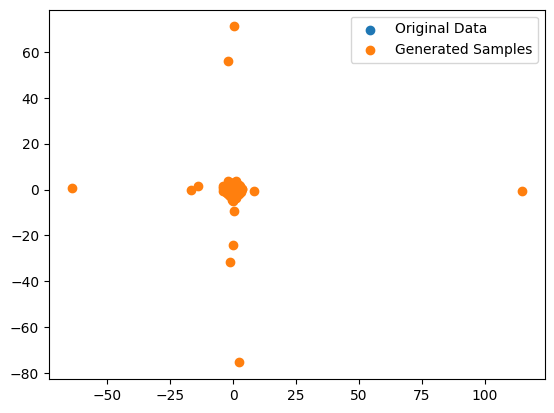

Epoch: 21100 and Loss: 0.7907153964042664
Epoch: 21200 and Loss: 0.7775811553001404
Epoch: 21300 and Loss: 0.7770047783851624
Epoch: 21400 and Loss: 0.7747969627380371
Epoch: 21500 and Loss: 0.7786155939102173
Epoch: 21600 and Loss: 0.7635456323623657
Epoch: 21700 and Loss: 0.7756019830703735
Epoch: 21800 and Loss: 0.7803240418434143
Epoch: 21900 and Loss: 0.7756052613258362
Epoch: 22000 and Loss: 0.7764876484870911


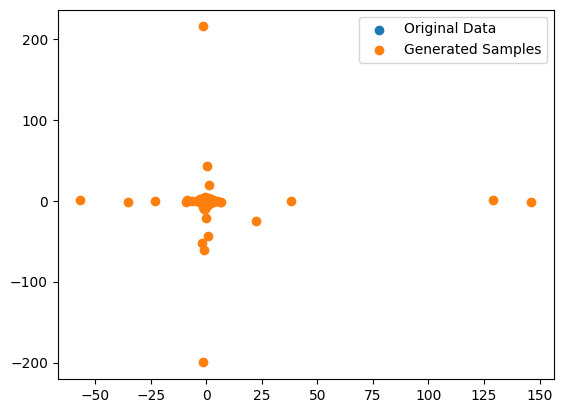

Epoch: 22100 and Loss: 0.7810075879096985
Epoch: 22200 and Loss: 0.771221935749054
Epoch: 22300 and Loss: 0.768032431602478
Epoch: 22400 and Loss: 0.7759778499603271
Epoch: 22500 and Loss: 0.764964759349823
Epoch: 22600 and Loss: 0.7801361680030823
Epoch: 22700 and Loss: 0.7679138779640198
Epoch: 22800 and Loss: 0.7811716198921204
Epoch: 22900 and Loss: 0.7859804034233093
Epoch: 23000 and Loss: 0.7877638339996338


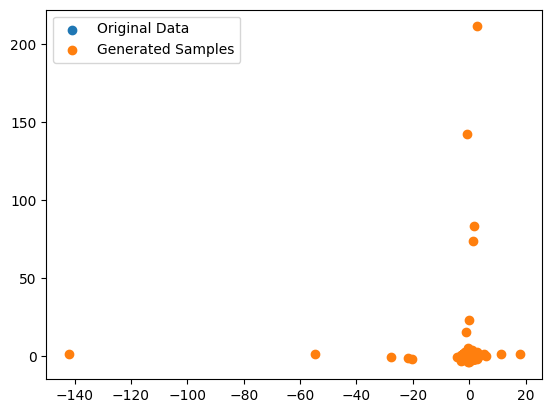

Epoch: 23100 and Loss: 0.7814363837242126
Epoch: 23200 and Loss: 0.7819916009902954
Epoch: 23300 and Loss: 0.7762966752052307
Epoch: 23400 and Loss: 0.7801015973091125
Epoch: 23500 and Loss: 0.7793582081794739
Epoch: 23600 and Loss: 0.7769207954406738
Epoch: 23700 and Loss: 0.7910301685333252
Epoch: 23800 and Loss: 0.7798497080802917
Epoch: 23900 and Loss: 0.7867205739021301
Epoch: 24000 and Loss: 0.7893521785736084


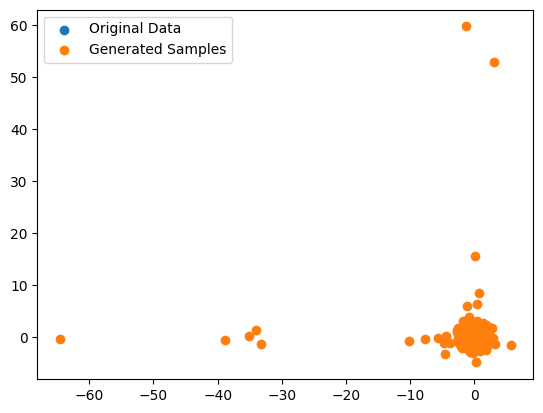

Epoch: 24100 and Loss: 0.7882948517799377
Epoch: 24200 and Loss: 0.7794846892356873
Epoch: 24300 and Loss: 0.7824671864509583
Epoch: 24400 and Loss: 0.778368353843689
Epoch: 24500 and Loss: 0.78331458568573
Epoch: 24600 and Loss: 0.7780270576477051
Epoch: 24700 and Loss: 0.7719974517822266
Epoch: 24800 and Loss: 0.7742061614990234
Epoch: 24900 and Loss: 0.7817516922950745
Epoch: 25000 and Loss: 0.773957371711731


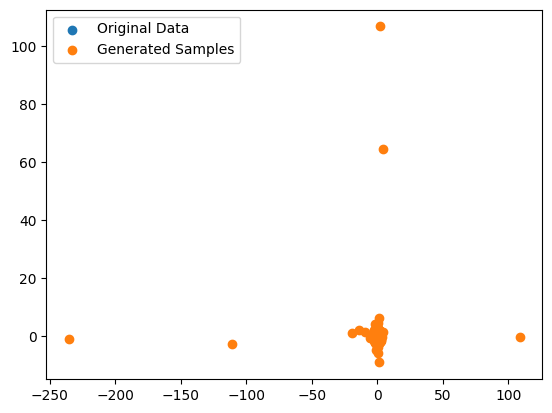

Epoch: 25100 and Loss: 0.7788702249526978
Epoch: 25200 and Loss: 0.7717257142066956
Epoch: 25300 and Loss: 0.78106689453125
Epoch: 25400 and Loss: 0.7807969450950623
Epoch: 25500 and Loss: 0.7744511961936951
Epoch: 25600 and Loss: 0.78684401512146
Epoch: 25700 and Loss: 0.7824357748031616
Epoch: 25800 and Loss: 0.7809774875640869
Epoch: 25900 and Loss: 0.7862285375595093
Epoch: 26000 and Loss: 0.7739408016204834


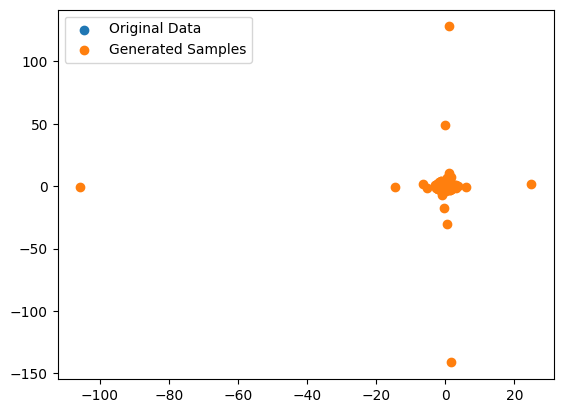

Epoch: 26100 and Loss: 0.7831692695617676
Epoch: 26200 and Loss: 0.7753521800041199
Epoch: 26300 and Loss: 0.7710018754005432
Epoch: 26400 and Loss: 0.7870805263519287
Epoch: 26500 and Loss: 0.7695290446281433
Epoch: 26600 and Loss: 0.7736491560935974
Epoch: 26700 and Loss: 0.7736947536468506
Epoch: 26800 and Loss: 0.7862563133239746
Epoch: 26900 and Loss: 0.7853807210922241
Epoch: 27000 and Loss: 0.7785885334014893


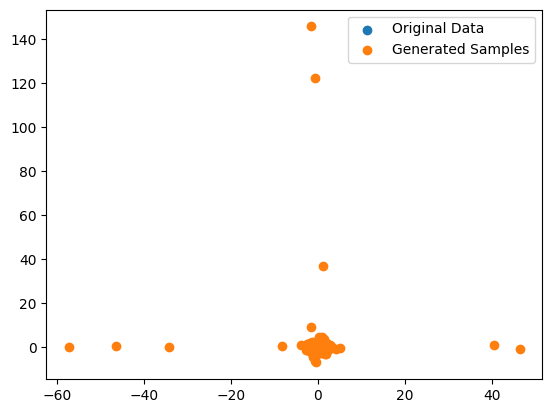

Epoch: 27100 and Loss: 0.7794837355613708
Epoch: 27200 and Loss: 0.7764154076576233
Epoch: 27300 and Loss: 0.7818777561187744
Epoch: 27400 and Loss: 0.7768892645835876
Epoch: 27500 and Loss: 0.7755813598632812
Epoch: 27600 and Loss: 0.7784230709075928
Epoch: 27700 and Loss: 0.7695949077606201
Epoch: 27800 and Loss: 0.7778691053390503
Epoch: 27900 and Loss: 0.7716913819313049
Epoch: 28000 and Loss: 0.7780902981758118


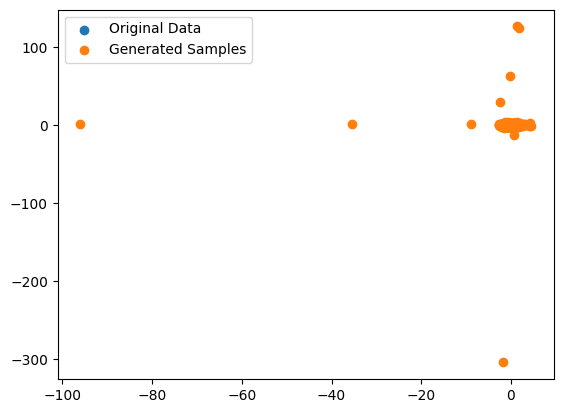

Epoch: 28100 and Loss: 0.7752673625946045
Epoch: 28200 and Loss: 0.778583824634552
Epoch: 28300 and Loss: 0.7794500589370728
Epoch: 28400 and Loss: 0.780178427696228
Epoch: 28500 and Loss: 0.77112877368927
Epoch: 28600 and Loss: 0.7712095379829407
Epoch: 28700 and Loss: 0.7639163732528687
Epoch: 28800 and Loss: 0.7747055292129517
Epoch: 28900 and Loss: 0.7691667675971985
Epoch: 29000 and Loss: 0.78669273853302


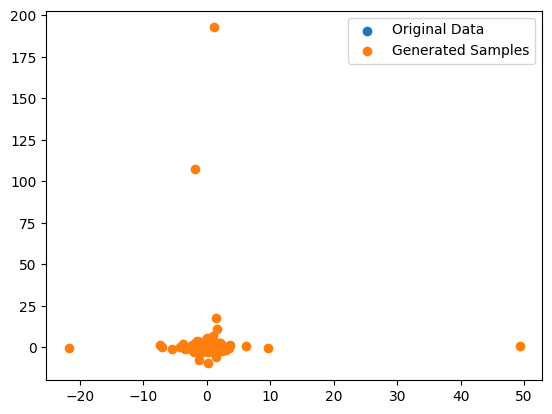

Epoch: 29100 and Loss: 0.7852497100830078
Epoch: 29200 and Loss: 0.7810075879096985
Epoch: 29300 and Loss: 0.7831020355224609
Epoch: 29400 and Loss: 0.7723315358161926
Epoch: 29500 and Loss: 0.7744709849357605
Epoch: 29600 and Loss: 0.7850011587142944
Epoch: 29700 and Loss: 0.7738232612609863
Epoch: 29800 and Loss: 0.7809226512908936
Epoch: 29900 and Loss: 0.7750228643417358
Epoch: 30000 and Loss: 0.7795952558517456


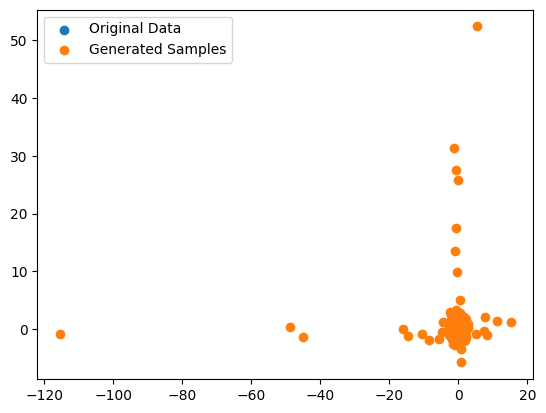

Epoch: 30100 and Loss: 0.7762039303779602
Epoch: 30200 and Loss: 0.7769300937652588
Epoch: 30300 and Loss: 0.7754418849945068
Epoch: 30400 and Loss: 0.7663198709487915
Epoch: 30500 and Loss: 0.7798925638198853
Epoch: 30600 and Loss: 0.7762718796730042
Epoch: 30700 and Loss: 0.7712144255638123
Epoch: 30800 and Loss: 0.7808426022529602
Epoch: 30900 and Loss: 0.7821912169456482
Epoch: 31000 and Loss: 0.7808929681777954


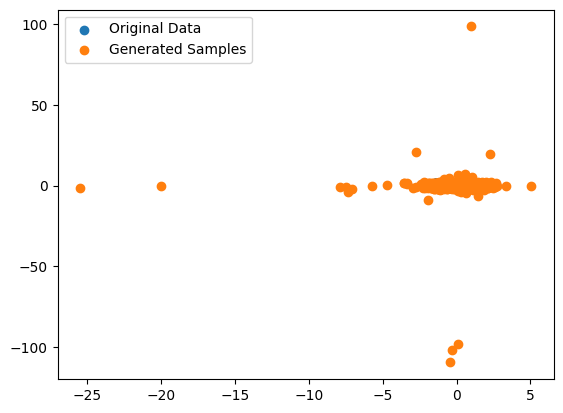

Epoch: 31100 and Loss: 0.7714312672615051
Epoch: 31200 and Loss: 0.7793272137641907
Epoch: 31300 and Loss: 0.7690838575363159
Epoch: 31400 and Loss: 0.7756025791168213
Epoch: 31500 and Loss: 0.7724536061286926
Epoch: 31600 and Loss: 0.7909497618675232
Epoch: 31700 and Loss: 0.7822592258453369
Epoch: 31800 and Loss: 0.7800881862640381
Epoch: 31900 and Loss: 0.7743205428123474
Epoch: 32000 and Loss: 0.7753303647041321


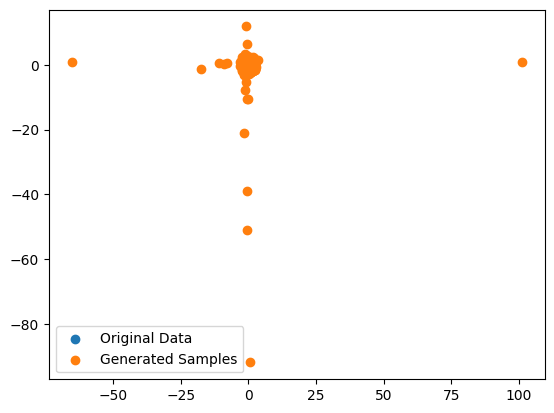

Epoch: 32100 and Loss: 0.7782213091850281
Epoch: 32200 and Loss: 0.7815132737159729
Epoch: 32300 and Loss: 0.7758187651634216
Epoch: 32400 and Loss: 0.76629239320755
Epoch: 32500 and Loss: 0.7780222296714783
Epoch: 32600 and Loss: 0.7744058966636658
Epoch: 32700 and Loss: 0.7861116528511047
Epoch: 32800 and Loss: 0.7871751189231873
Epoch: 32900 and Loss: 0.7836655378341675
Epoch: 33000 and Loss: 0.7784938216209412


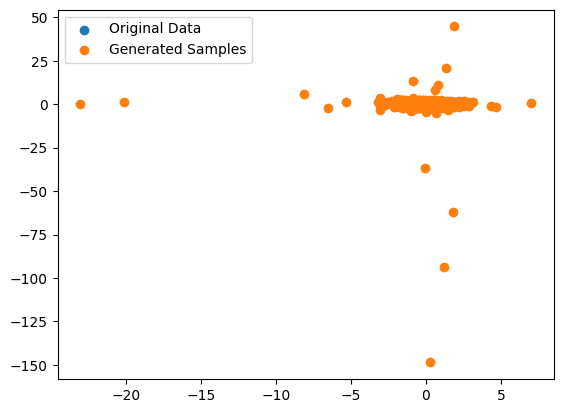

Epoch: 33100 and Loss: 0.7752633690834045
Epoch: 33200 and Loss: 0.7736848592758179
Epoch: 33300 and Loss: 0.7794600129127502
Epoch: 33400 and Loss: 0.7775289416313171
Epoch: 33500 and Loss: 0.772439181804657
Epoch: 33600 and Loss: 0.784980058670044
Epoch: 33700 and Loss: 0.7888265252113342
Epoch: 33800 and Loss: 0.7750065326690674
Epoch: 33900 and Loss: 0.7834789156913757
Epoch: 34000 and Loss: 0.780717134475708


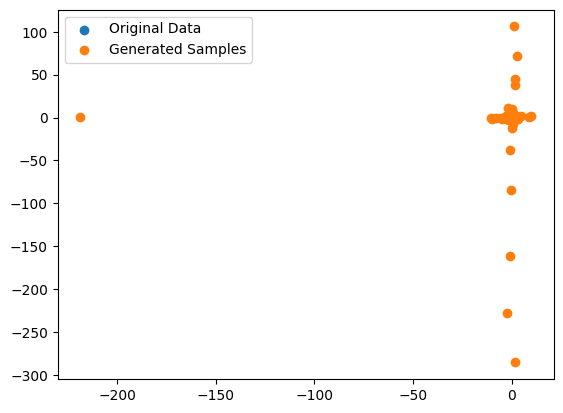

Epoch: 34100 and Loss: 0.7726296186447144
Epoch: 34200 and Loss: 0.7795829772949219
Epoch: 34300 and Loss: 0.7797749042510986
Epoch: 34400 and Loss: 0.781688928604126
Epoch: 34500 and Loss: 0.7697476148605347
Epoch: 34600 and Loss: 0.7640884518623352
Epoch: 34700 and Loss: 0.7786232829093933
Epoch: 34800 and Loss: 0.7776437401771545
Epoch: 34900 and Loss: 0.7724720239639282
Epoch: 35000 and Loss: 0.778623104095459


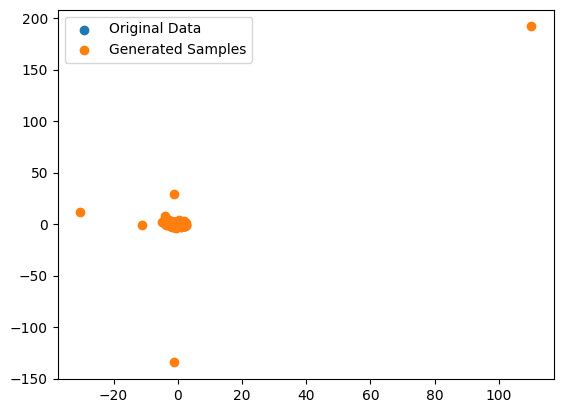

Epoch: 35100 and Loss: 0.7821707725524902
Epoch: 35200 and Loss: 0.7758153676986694
Epoch: 35300 and Loss: 0.778969407081604
Epoch: 35400 and Loss: 0.777743399143219
Epoch: 35500 and Loss: 0.7787442207336426
Epoch: 35600 and Loss: 0.767635703086853
Epoch: 35700 and Loss: 0.7773151397705078
Epoch: 35800 and Loss: 0.7975867390632629
Epoch: 35900 and Loss: 0.7728186249732971
Epoch: 36000 and Loss: 0.7786839008331299


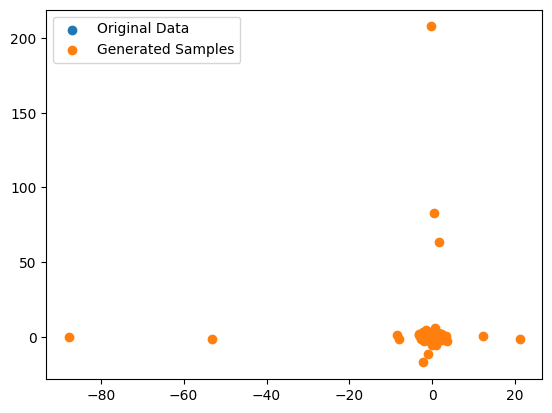

Epoch: 36100 and Loss: 0.7817115187644958
Epoch: 36200 and Loss: 0.7762059569358826
Epoch: 36300 and Loss: 0.7783565521240234
Epoch: 36400 and Loss: 0.779412031173706
Epoch: 36500 and Loss: 0.7772200703620911
Epoch: 36600 and Loss: 0.7734336853027344
Epoch: 36700 and Loss: 0.7804094552993774
Epoch: 36800 and Loss: 0.7813255190849304
Epoch: 36900 and Loss: 0.7811681628227234
Epoch: 37000 and Loss: 0.7722375988960266


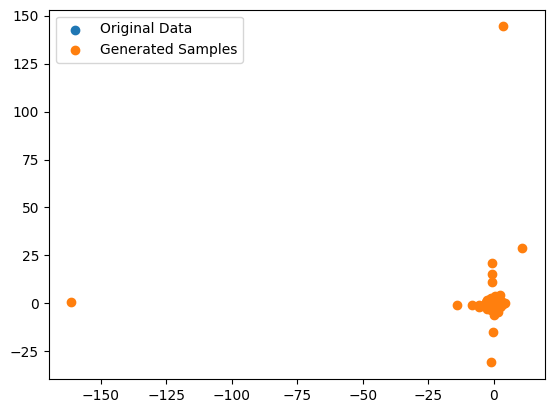

Epoch: 37100 and Loss: 0.7814543843269348
Epoch: 37200 and Loss: 0.7861155867576599
Epoch: 37300 and Loss: 0.7729319930076599
Epoch: 37400 and Loss: 0.7744209170341492
Epoch: 37500 and Loss: 0.7777414917945862
Epoch: 37600 and Loss: 0.7739812731742859
Epoch: 37700 and Loss: 0.7788976430892944
Epoch: 37800 and Loss: 0.7818383574485779
Epoch: 37900 and Loss: 0.7892696261405945
Epoch: 38000 and Loss: 0.7779496908187866


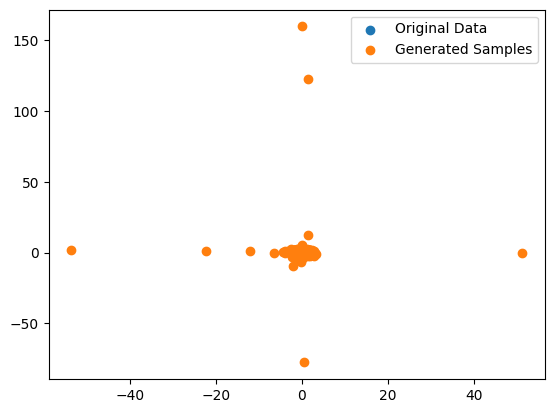

Epoch: 38100 and Loss: 0.7749437093734741
Epoch: 38200 and Loss: 0.7670348882675171
Epoch: 38300 and Loss: 0.7833693623542786
Epoch: 38400 and Loss: 0.7765793800354004
Epoch: 38500 and Loss: 0.7698090076446533
Epoch: 38600 and Loss: 0.7792767286300659
Epoch: 38700 and Loss: 0.7799929976463318
Epoch: 38800 and Loss: 0.7758906483650208
Epoch: 38900 and Loss: 0.7727914452552795
Epoch: 39000 and Loss: 0.7853224277496338


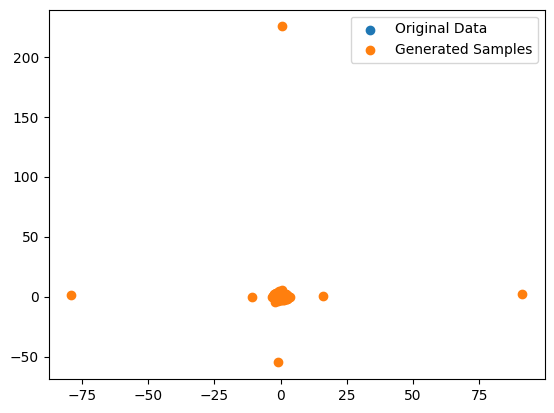

Epoch: 39100 and Loss: 0.7697401642799377
Epoch: 39200 and Loss: 0.7752325534820557
Epoch: 39300 and Loss: 0.7737846374511719
Epoch: 39400 and Loss: 0.7785305976867676
Epoch: 39500 and Loss: 0.7656486630439758
Epoch: 39600 and Loss: 0.7734584808349609
Epoch: 39700 and Loss: 0.7802344560623169
Epoch: 39800 and Loss: 0.7616076469421387
Epoch: 39900 and Loss: 0.7866322994232178
Epoch: 40000 and Loss: 0.7797402143478394


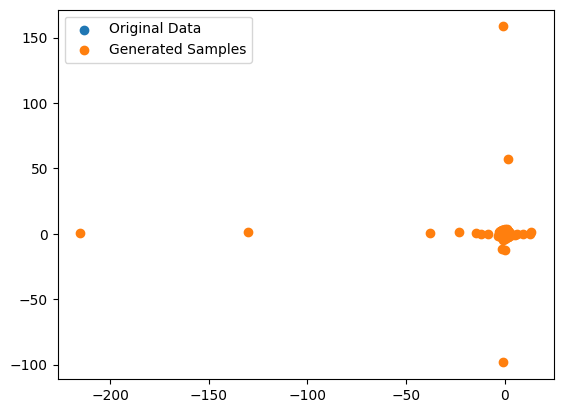

Epoch: 40100 and Loss: 0.7761363983154297
Epoch: 40200 and Loss: 0.7755224108695984
Epoch: 40300 and Loss: 0.784217357635498
Epoch: 40400 and Loss: 0.7753110527992249
Epoch: 40500 and Loss: 0.7784900665283203
Epoch: 40600 and Loss: 0.7814371585845947
Epoch: 40700 and Loss: 0.789411187171936
Epoch: 40800 and Loss: 0.7751205563545227
Epoch: 40900 and Loss: 0.7835651636123657
Epoch: 41000 and Loss: 0.7797392010688782


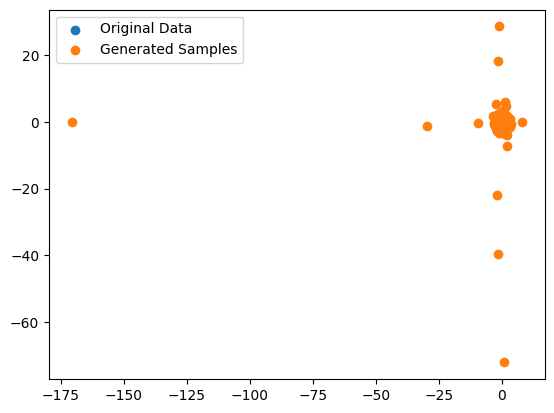

Epoch: 41100 and Loss: 0.7828695178031921
Epoch: 41200 and Loss: 0.766974925994873
Epoch: 41300 and Loss: 0.7839937806129456
Epoch: 41400 and Loss: 0.7837924957275391
Epoch: 41500 and Loss: 0.7746400237083435
Epoch: 41600 and Loss: 0.7749505639076233
Epoch: 41700 and Loss: 0.7791497707366943
Epoch: 41800 and Loss: 0.7669950127601624
Epoch: 41900 and Loss: 0.7828823924064636
Epoch: 42000 and Loss: 0.7752920389175415


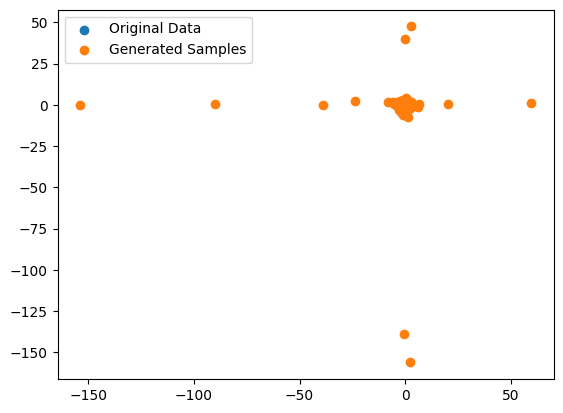

Epoch: 42100 and Loss: 0.7916436791419983
Epoch: 42200 and Loss: 0.783230721950531
Epoch: 42300 and Loss: 0.7766427397727966
Epoch: 42400 and Loss: 0.7798097133636475
Epoch: 42500 and Loss: 0.7671148180961609
Epoch: 42600 and Loss: 0.7679152488708496


KeyboardInterrupt: 

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SinusoidalEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        x = x * self.scale
        half_size = self.size // 2
        emb = torch.log(torch.Tensor([10000.0])) / (half_size - 1)
        emb = torch.exp(-emb * torch.arange(half_size))
        emb = x.unsqueeze(-1) * emb.unsqueeze(0)
        emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=-1)
        return emb

    def __len__(self):
        return self.size
    
class PositionalEmbedding(nn.Module):
    def __init__(self, size: int,  **kwargs):
        super().__init__()

        self.layer = SinusoidalEmbedding(size, **kwargs)
        
    def forward(self, x: torch.Tensor):
        return self.layer(x)


class Block(nn.Module):
    def __init__(self, size: int):
        super().__init__()

        self.ff = nn.Linear(size, size)
        self.act = nn.GELU()

    def forward(self, x: torch.Tensor):
        return x + self.act(self.ff(x))


class MLP(nn.Module):
    def __init__(self, hidden_size: int = 128, hidden_layers: int = 3, emb_size: int = 128):
        super().__init__()

        self.time_mlp = PositionalEmbedding(emb_size)
        self.input_mlp1 = PositionalEmbedding(emb_size, scale=25.0)
        self.input_mlp2 = PositionalEmbedding(emb_size, scale=25.0)

        concat_size = len(self.time_mlp.layer) + \
            len(self.input_mlp1.layer) + len(self.input_mlp2.layer)
        layers = [nn.Linear(concat_size, hidden_size), nn.GELU()]
        for _ in range(hidden_layers):
            layers.append(Block(hidden_size))
        layers.append(nn.Linear(hidden_size, 2))
        self.joint_mlp = nn.Sequential(*layers)

    def forward(self, x, t):
        x1_emb = self.input_mlp1(x[:, 0])
        x2_emb = self.input_mlp2(x[:, 1])
        t_emb = self.time_mlp(t)
        x = torch.cat((x1_emb, x2_emb, t_emb), dim=-1)
        x = self.joint_mlp(x)
        return x
    
def alpha(t, Bmin, Bmax):
   x=Bmin*t+((Bmax-Bmin)*t**2)/2
   a=torch.exp(-x/2)
   return a

# SDE Probability transition
def p(x, t, Bmin, Bmax):
    a=alpha(t,Bmin, Bmax)
    a = a.unsqueeze(1)
    mu=x*a
    std=(1-a**2)**0.5
    return mu, std

# Loss function
def loss_function(score_net, x, Bmin=0.1, Bmax=20, eps=1e-5):
    random_t = torch.rand(x.shape[0], device=x.device) * (1. - eps) + eps 
    z = torch.randn_like(x)
    mu, std=p(x, random_t, Bmin, Bmax)
    perturbed_x=mu+std*z
    score= score_net(perturbed_x, random_t)
    lamb=1/B(random_t)
    lamb = lamb.unsqueeze(1)
    loss = torch.mean(lamb*torch.square((std*score  + z)))
    
    return loss

def train_score_network(dataloader, score_net, epochs):
    optimizer = optim.Adam(score_net.parameters(), lr=1e-4)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)
    avg=0
    for epoch in range(epochs):
        for x_batch, in dataloader:
            optimizer.zero_grad()
            loss = loss_function(score_net, x_batch)
            loss.backward()
            nn.utils.clip_grad_norm_(score_net.parameters(), 1.0)
            optimizer.step()
            avg+=loss
        scheduler.step()
        if (epoch%10==0):
            print(f'Epoch: {epoch} and Loss: {avg/10}' )
            avg=0
        if(epoch%100==0):
            samples = sample_from_noise(score_net, num_samples=1000, N=1000)
            # Convert samples to numpy for plotting
            samples_np = samples.detach().numpy()

            # Plot the data
            plt.scatter(data[:, 0], data[:, 1], label='Original Data')
            plt.scatter(samples_np[:, 0], samples_np[:, 1], label='Generated Samples')
            plt.legend()
            plt.show()

def sample_from_noise(score_net, num_samples, N):
    # Initial sample of x
    x = torch.randn(num_samples, 2) 
     # Time step size
    dt = torch.tensor(1.0 / N)

    indices = torch.arange(N)
    time_steps = 1 + indices / (N - 1) * (dt - 1)
    

    for t in time_steps:
        t1=torch.ones(num_samples) * t 
        score = score_net(x, t1)  
        
        x = x + (B(t)/2*x + B(t)*score )*dt + B(t)**.5 * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)
        
    return x


data = generate_data('square', num_samples=4000)  # Or 'star', 'box', etc.

dataloader = DataLoader(TensorDataset(data), batch_size=1000, shuffle=True)
score_net = MLP()
train_score_network(dataloader, score_net, epochs=100001)

# Generate samples
samples = sample_from_noise(score_net, num_samples=1000, N=1000)
# Convert samples to numpy for plotting
samples_np = samples.detach().numpy()

# Plot the data
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(samples_np[:, 0], samples_np[:, 1], label='Generated Samples')
plt.legend()
plt.show()


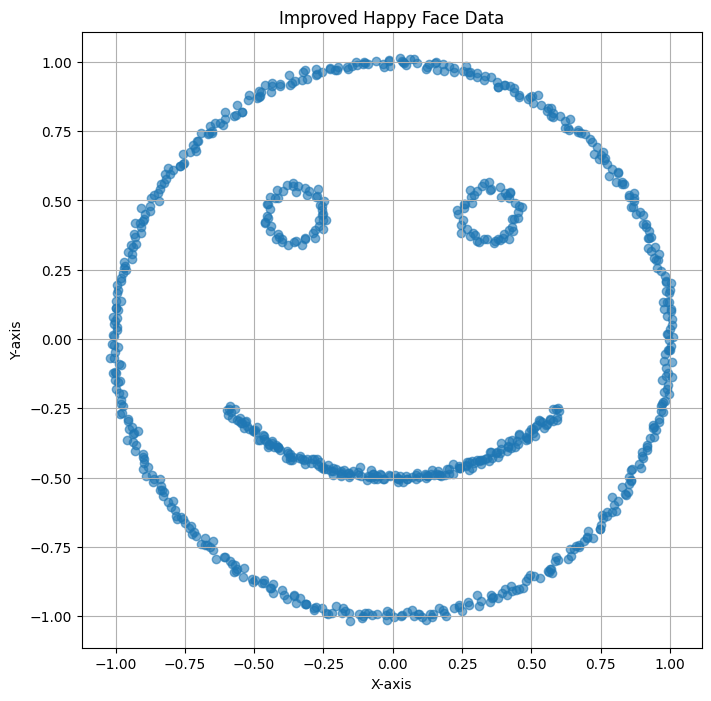

In [40]:
def generate_happy_face_data_improved(num_samples=1000, spread=0.01):
    """
    Generates a dataset shaped like a happy face with clearer features.
    :param num_samples: Total number of samples to generate.
    :param spread: Standard deviation for the Gaussian noise added to the features.
    :return: Tensor of shape (num_samples, 2) containing the happy face data.
    """
    # Create an empty list to hold data points
    data_points = []

    # Face outline - circle
    face_samples = num_samples // 2
    angles = np.linspace(0, 2 * np.pi, face_samples)
    x_face = np.cos(angles)
    y_face = np.sin(angles)
    data_points.extend(zip(x_face, y_face))

    # Eyes - two smaller circles
    eye_samples = num_samples // 20
    eye_radius = 0.1
    angles = np.linspace(0, 2 * np.pi, eye_samples)

    # Left eye
    x_left_eye = -0.35 + eye_radius * np.cos(angles)
    y_left_eye = 0.45 + eye_radius * np.sin(angles)
    data_points.extend(zip(x_left_eye, y_left_eye))

    # Right eye
    x_right_eye = 0.35 + eye_radius * np.cos(angles)
    y_right_eye = 0.45 + eye_radius * np.sin(angles)
    data_points.extend(zip(x_right_eye, y_right_eye))

    # Smile - semi-circle
    smile_samples = num_samples // 5
    angles = np.linspace(0.75 * np.pi, 0.25 * np.pi, smile_samples)
    x_smile = -0.85 * np.cos(angles)
    y_smile = -0.85 * np.sin(angles) + 0.35
    data_points.extend(zip(x_smile, y_smile))

    # Convert data_points to numpy array and shuffle
    data = np.array(data_points)
    np.random.shuffle(data)

    # Add Gaussian noise
    data += np.random.normal(scale=spread, size=data.shape)

    return torch.tensor(data, dtype=torch.float32)

# Generate the improved happy face data
happy_face_data_improved = generate_happy_face_data_improved()

# Plotting the improved happy face data
plt.figure(figsize=(8, 8))
plt.scatter(happy_face_data_improved[:, 0], happy_face_data_improved[:, 1], alpha=0.6)
plt.title('Improved Happy Face Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  # This ensures the aspect ratio is equal and the plot is not distorted
plt.grid(True)
plt.show()
